# Анализ трендов кластеров площади ПГОТ (поверхностного городского острова тепла) в пределах частей московской агломерации

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as st

In [3]:
df = pd.read_excel(r"D:\Kursach_2\processed_arcgis\cluster_by_ckad_rgn\merged.xlsx")

# Входные данные: площадь кластеров ПГОТ за 5-летние периоды (получено через GIS вручную на основе данных с GEE)

In [4]:
df.head()

,Зона,Минимальная интенсивность,Низкая интенсивность,Повышенная интенсивность,Максимальная интенсивность,Период,year_start,year_end
0,Пригород,3027762000,2124839700,507577500,76207500,1984-1988,1984,1988
1,Москва,236421000,521971200,284831100,71460000,1984-1988,1984,1988
2,Новая Москва,358628400,245222100,10174500,731700,1984-1988,1984,1988
3,Пригород,3435403500,2027970000,245826000,27191700,1989-1993,1989,1993
4,Москва,234855900,541503000,284463900,53860500,1989-1993,1989,1993


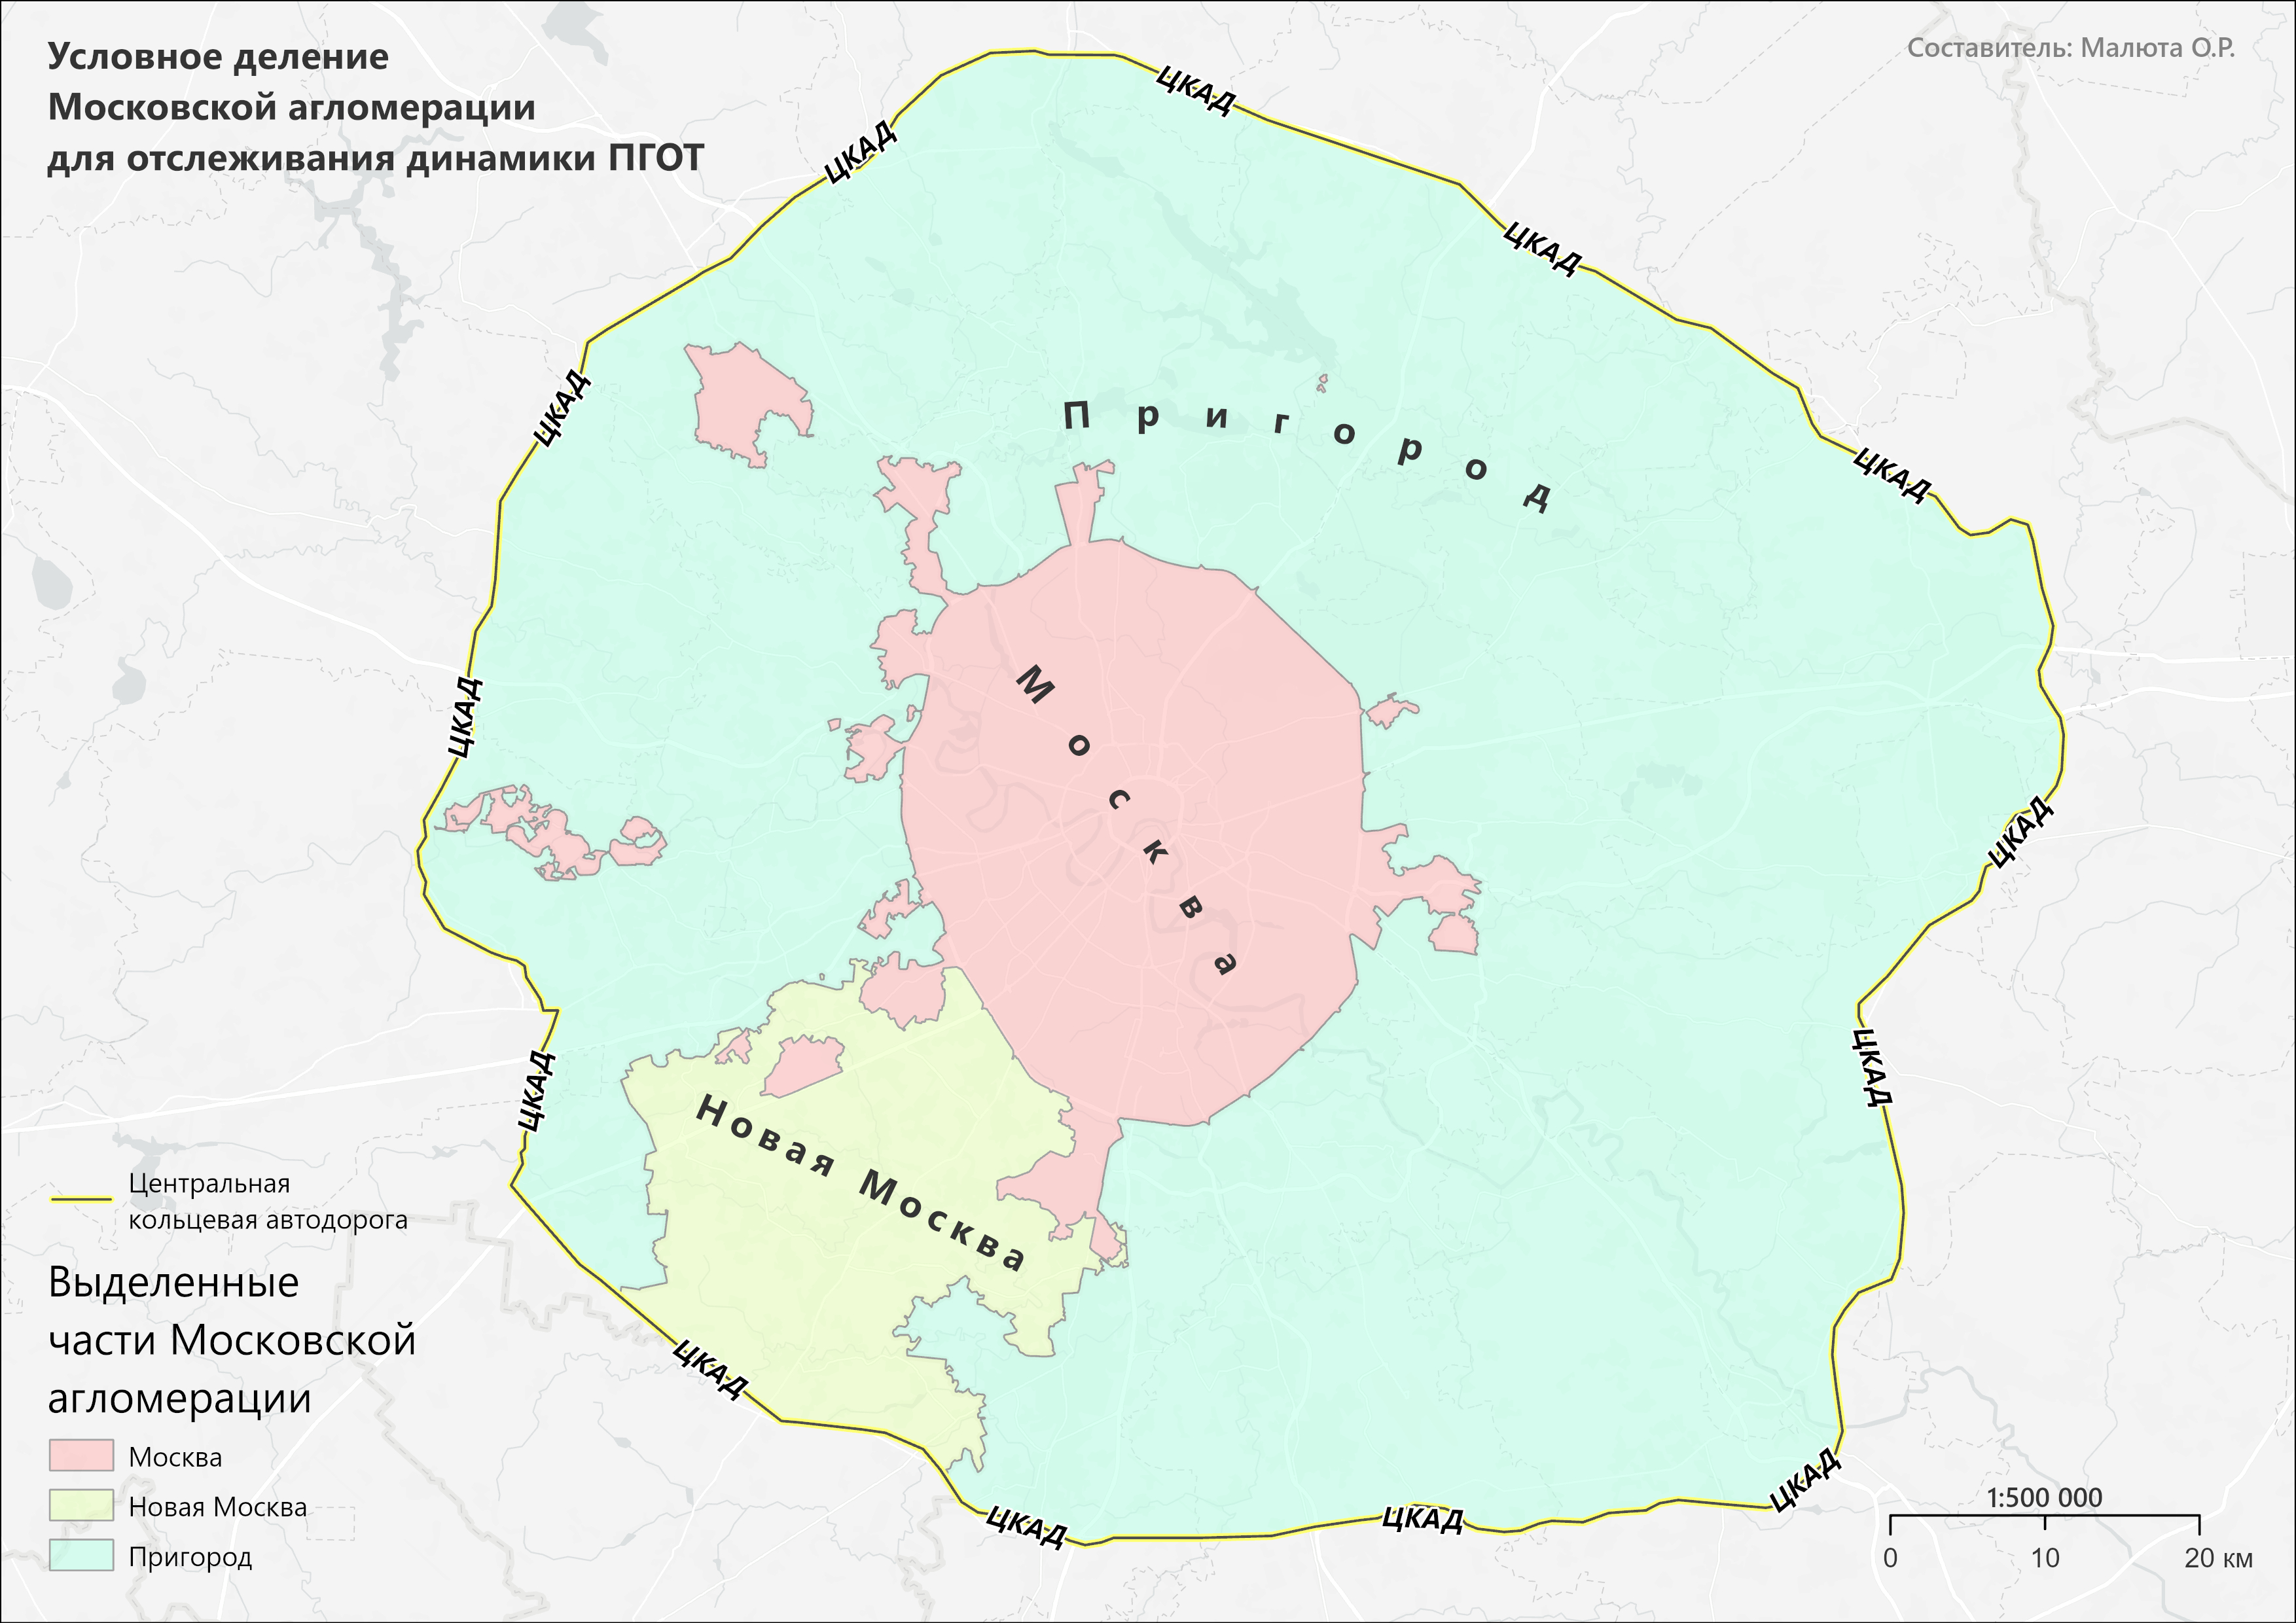

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Зона                        24 non-null     object
 1   Минимальная интенсивность   24 non-null     int64 
 2   Низкая интенсивность        24 non-null     int64 
 3   Повышенная интенсивность    24 non-null     int64 
 4   Максимальная интенсивность  24 non-null     int64 
 5   Период                      24 non-null     object
 6   year_start                  24 non-null     int64 
 7   year_end                    24 non-null     int64 
dtypes: int64(6), object(2)
memory usage: 1.6+ KB


In [6]:
df.columns = ['Name', 'Минимальная интенсивность', 'Низкая интенсивность', 'Повышенная интенсивность', 
              'Максимальная интенсивность', 'yrange', 'y1', 'y2']

In [7]:
df[df.columns[1:5]] = df[df.columns[1:5]].apply(lambda x: x/1000000)

# Из м2 в км2

In [8]:
df['yrange'].unique()

# Уникальные 5-летние периоды, использованные для агрегации и кластеризации исходных данных по ПГОТ

array(['1984-1988', '1989-1993', '1994-1998', '1999-2003', '2004-2008',
       '2009-2014', '2015-2019', '2020-2024'], dtype=object)

In [9]:
df = df.set_index('Name')

# Смотрим по частям агломерации

In [10]:
suburb = df.loc['Пригород']
moscow = df.loc['Москва']
new_m = df.loc['Новая Москва']
zones = [suburb, moscow, new_m]

# Наши части агломерации

In [11]:
x = df['yrange'].unique().tolist()
y = df.columns[:4].tolist()
colors = ['darkgrey', '#ece133', 'darkorange', 'firebrick']

Строим графики и линии тренда для площади кластеров ПГОТ по частям агломерации

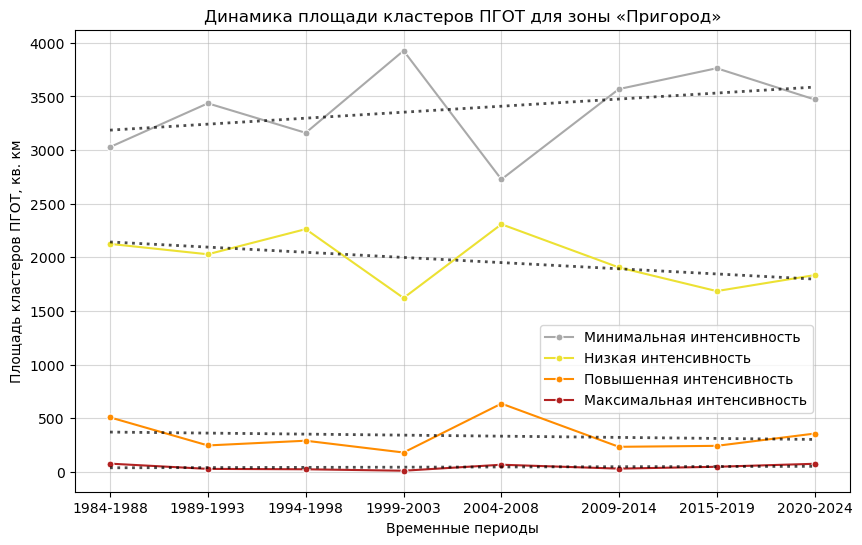

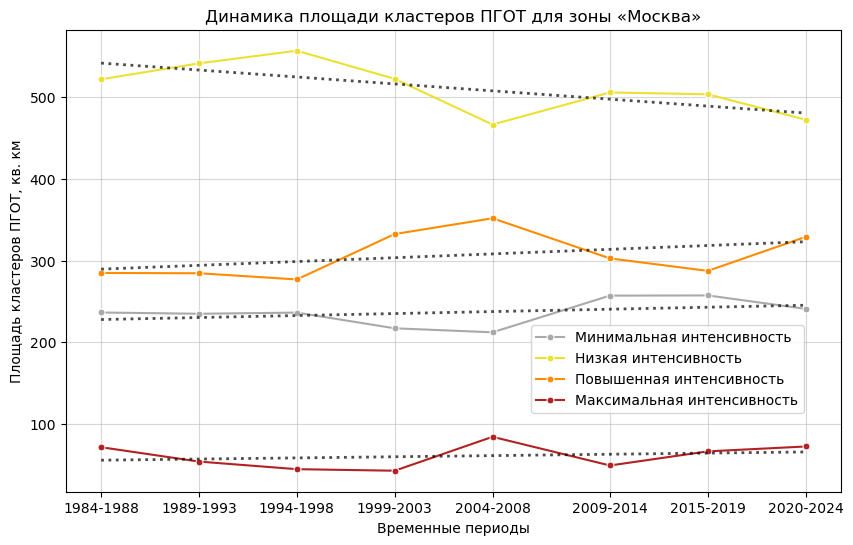

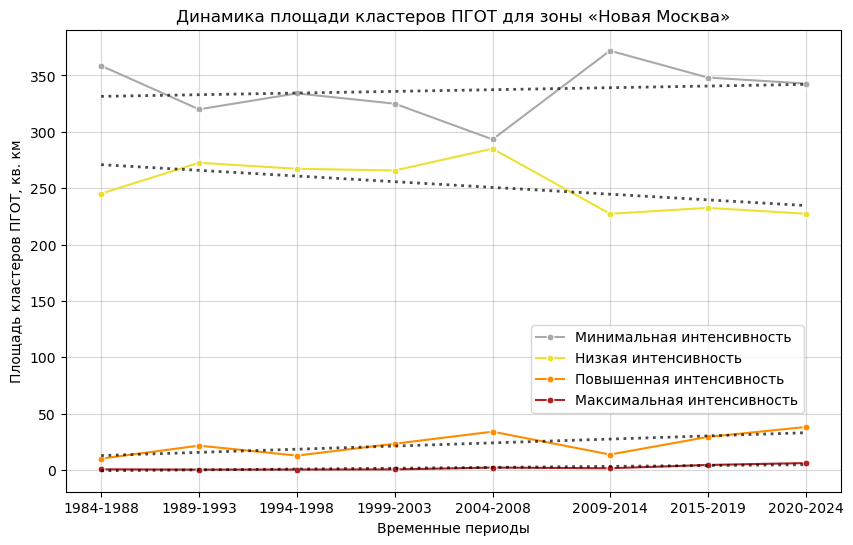

In [12]:
results = []

for zone in zones:
    
    data = zone

    fig, ax = plt.subplots(figsize=(10,6))
    
    
    for clustertype in range(len(y)):
        sns.lineplot(data=data, x=data['y2'], y=y[clustertype], color=colors[clustertype], marker='.', ms=10, 
                     markeredgecolor = 'white', label=y[clustertype])
        
        # Линейная регрессия для линии тренда
        slope, intercept, r_value, p_value, std_err = st.linregress(data['y2'], data[y[clustertype]])
        # Регрессию получаем на основе последнего года каждого периода, т.к. на вход требуется именно число
        ax.plot(data['y2'], slope*data['y2'] + intercept, ls=':', lw=2, color = 'black', alpha=0.7)

        # Сохраняем результат
        results.append({
            'zone': zone.index[0],
            'n_points': len(zone),
            'cluster_type': y[clustertype],
            'slope': slope,
            'intercept': intercept,
            'r_value': r_value,
            'p_value': p_value,
            'std_err': std_err
        })

    plt.legend(loc=(0.6,0.17), prop={'size': 10})

    # Задаём явно метки на оси X
    # Устанавливаем позиции (ticks)
    ax.set_xticks(data['y2'].unique())
    # Устанавливаем подписи
    ax.set_xticklabels(data['yrange'].unique().tolist(), rotation=0)
    
    ax.grid('lightgrey', alpha=0.5)
    ax.set_ylabel('Площадь кластеров ПГОТ, кв. км')
    ax.set_xlabel('Временные периоды')
    ax.set_title(f'Динамика площади кластеров ПГОТ для зоны «{zone.index[0]}»')
    
    #plt.savefig(f"D:\Kursach_2\comps\plots\cluster_square\{zone.index[0]}.png", bbox_inches='tight')
    
    plt.show()
    
res_df = pd.DataFrame(results)

In [13]:
res_df

# Результаты трендов

,zone,n_points,cluster_type,slope,intercept,r_value,p_value,std_err
0,Пригород,8,Минимальная интенсивность,11.150335,-18981.458748,0.358418,0.383302,11.856733
1,Пригород,8,Низкая интенсивность,-9.616448,21260.359519,-0.479356,0.229401,7.187662
2,Пригород,8,Повышенная интенсивность,-1.912546,4172.683454,-0.153988,0.715805,5.010022
3,Пригород,8,Максимальная интенсивность,0.378650,-715.173889,0.188843,0.654248,0.803853
4,Москва,8,Минимальная интенсивность,0.486005,-738.360437,0.379446,0.353880,0.483790
5,Москва,8,Низкая интенсивность,-1.699351,3920.119233,-0.690144,0.058161,0.727460
6,Москва,8,Повышенная интенсивность,0.933271,-1565.844315,0.424639,0.294337,0.812335
7,Москва,8,Максимальная интенсивность,0.280077,-501.235900,0.234895,0.575505,0.473156
8,Новая Москва,8,Минимальная интенсивность,0.295667,-256.326149,0.153179,0.717250,0.778702
9,Новая Москва,8,Низкая интенсивность,-1.006847,2272.508383,-0.565652,0.143921,0.599247


In [14]:
df

,Минимальная интенсивность,Низкая интенсивность,Повышенная интенсивность,Максимальная интенсивность,yrange,y1,y2
Name,,,,,,,
Пригород,3027.7620,2124.8397,507.5775,76.2075,1984-1988,1984,1988
Москва,236.4210,521.9712,284.8311,71.4600,1984-1988,1984,1988
Новая Москва,358.6284,245.2221,10.1745,0.7317,1984-1988,1984,1988
Пригород,3435.4035,2027.9700,245.8260,27.1917,1989-1993,1989,1993
Москва,234.8559,541.5030,284.4639,53.8605,1989-1993,1989,1993
Новая Москва,319.9869,272.5974,21.7413,0.4320,1989-1993,1989,1993
Пригород,3160.2123,2262.6189,289.9152,23.6529,1994-1998,1994,1998
Москва,236.2905,556.9632,276.8742,44.5554,1994-1998,1994,1998
Новая Москва,334.1007,267.2640,12.8844,0.5076,1994-1998,1994,1998


In [15]:
df_extreme = df[(df['yrange'] == '1984-1988') | (df['yrange'] == '2020-2024')]

# Крайние периоды

In [16]:
df_extreme = df_extreme.reset_index()

# Убираем индекс

In [17]:
df_extreme

,Name,Минимальная интенсивность,Низкая интенсивность,Повышенная интенсивность,Максимальная интенсивность,yrange,y1,y2
0,Пригород,3027.7620,2124.8397,507.5775,76.2075,1984-1988,1984,1988
1,Москва,236.4210,521.9712,284.8311,71.4600,1984-1988,1984,1988
2,Новая Москва,358.6284,245.2221,10.1745,0.7317,1984-1988,1984,1988
3,Пригород,3471.5610,1833.5538,356.4252,74.8503,2020-2024,2020,2024
4,Москва,240.8544,472.4883,329.0049,72.3357,2020-2024,2020,2024
5,Новая Москва,342.8415,227.3985,38.2374,6.2802,2020-2024,2020,2024


Строим barplots для сравнения площадей кластеров ПГОТ за крайние периоды: 1984-1988 и 2020-2024

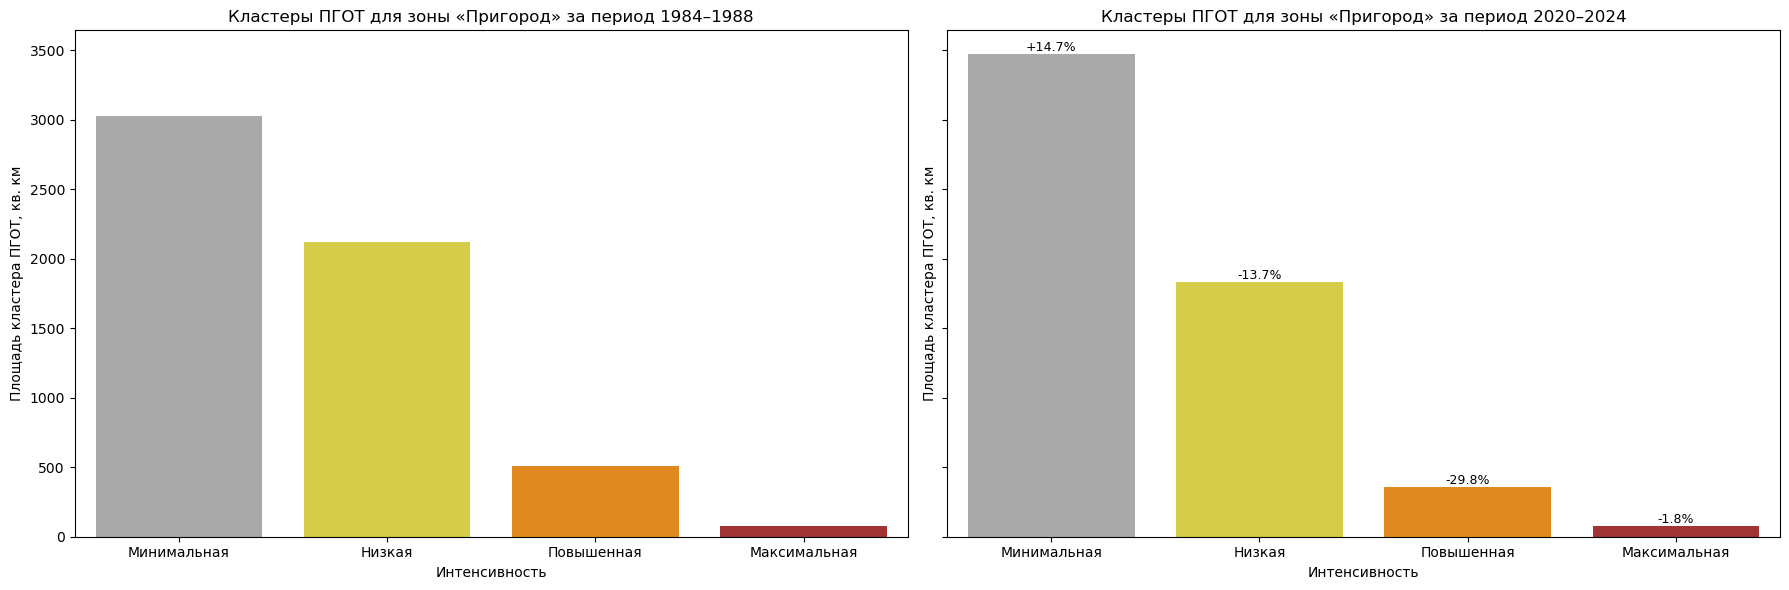

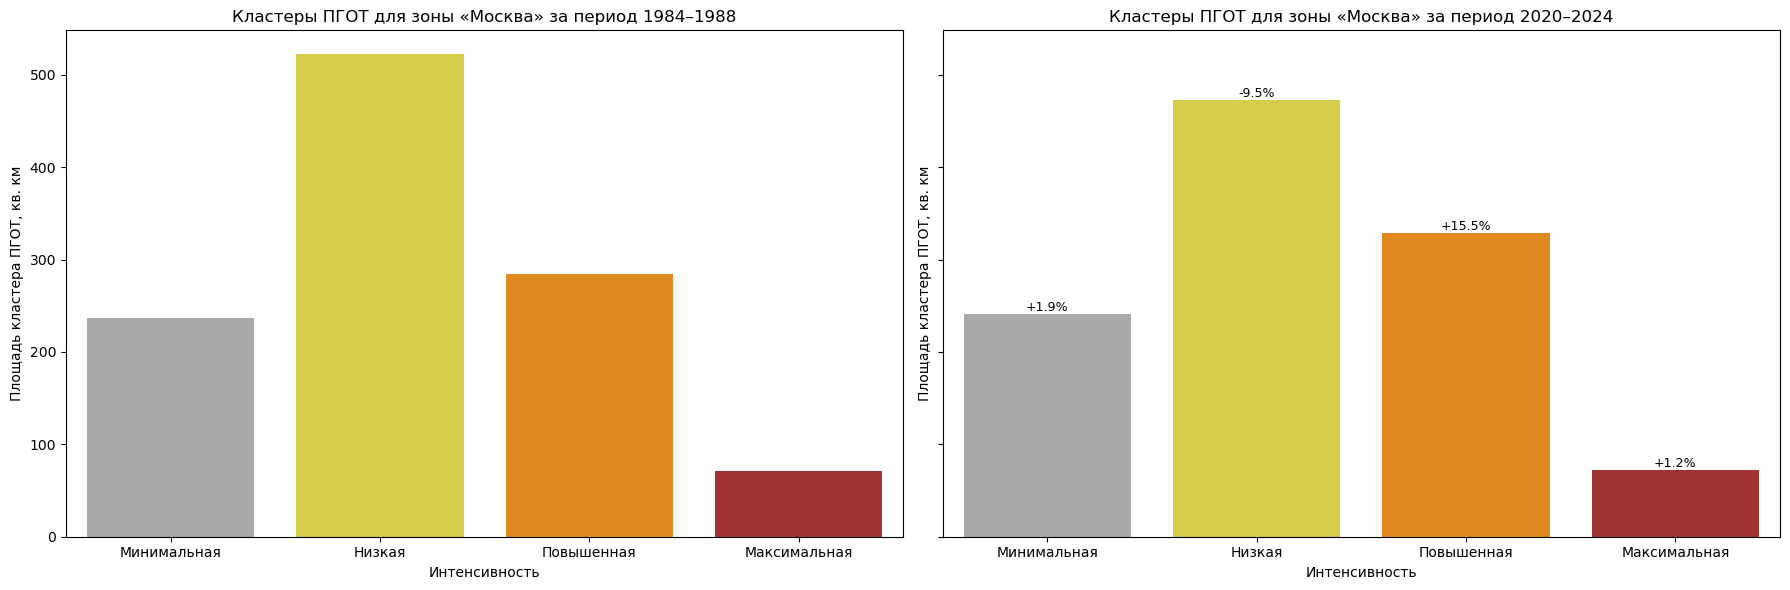

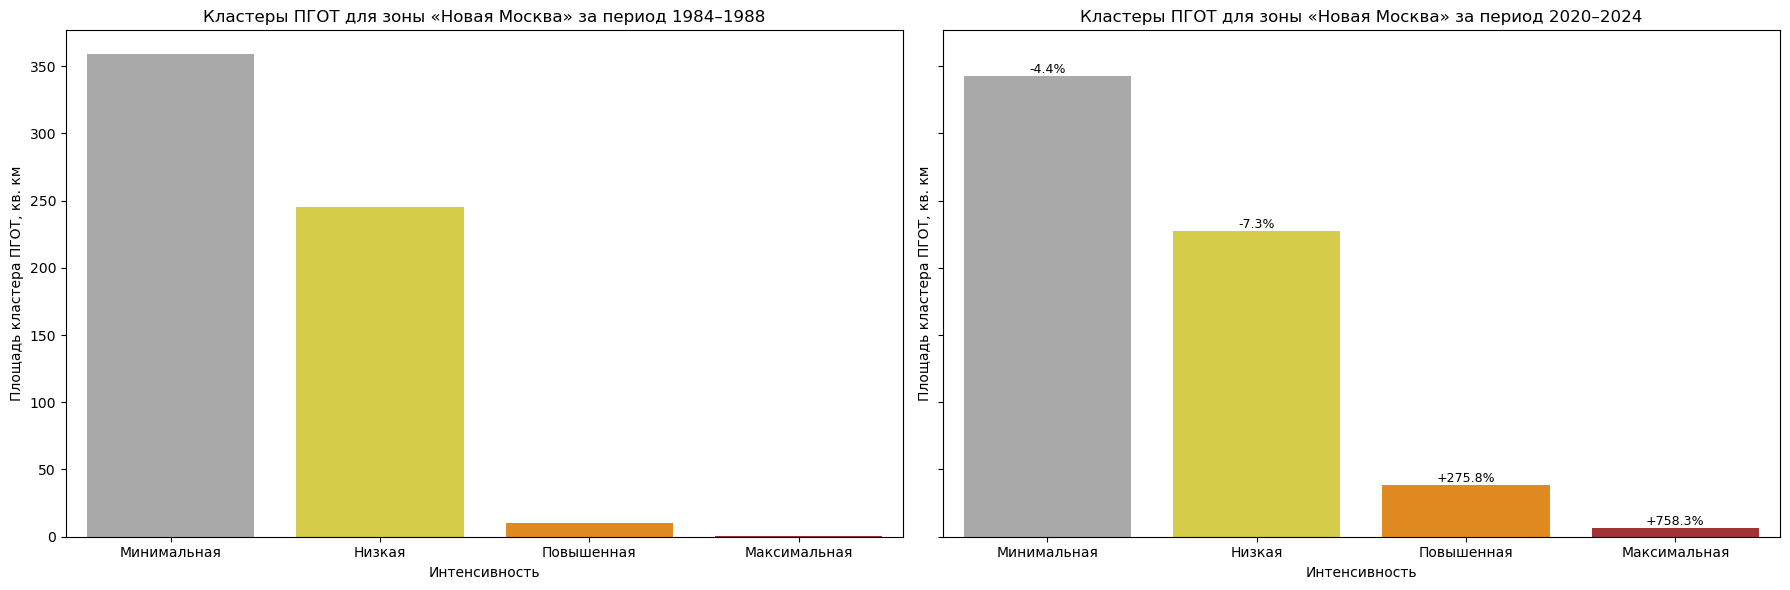

In [18]:
# Из широкого формата в длинный: тип интенсивности теперь один столбец, а площадь - другой
df_long = df_extreme.melt(
    id_vars=['Name', 'y1', 'y2'],
    value_vars=['Минимальная интенсивность', 'Низкая интенсивность', 'Повышенная интенсивность', 'Максимальная интенсивность'],
    var_name='IntensityType',
    value_name='IntensityValue'
)

# Фильтруем данные для двух периодов:
# Период 1984–1988: y1 == 1984, y2 == 1988
# Период 2020–2024: y1 == 2020, y2 == 2024
df_period1 = df_long.query("y1 == 1984 & y2 == 1988")
df_period2 = df_long.query("y1 == 2020 & y2 == 2024")

# Определяем порядок подтипов интенсивности и соответствующую палитру цветов
intensity_order = ['Минимальная интенсивность', 'Низкая интенсивность', 'Повышенная интенсивность', 'Максимальная интенсивность']
custom_palette = ['darkgrey', '#ece133', 'darkorange', 'firebrick']

# Подписи для оси x
xlabels = [label.replace(" интенсивность", "") for label in intensity_order]

# Вычисляем процентное изменение для каждого сочетания зоны и типа интенсивности
df_84 = df_period1.reset_index().rename(columns={'IntensityValue': 'Value84'})
df_20 = df_period2.reset_index().rename(columns={'IntensityValue': 'Value20'})
df_change = pd.merge(df_84, df_20, on=['Name', 'IntensityType'])
df_change['pct_change'] = (df_change['Value20'] - df_change['Value84']) / df_change['Value84'] * 100

# Получаем список уникальных зон
zones = df_extreme['Name'].unique()

# Для каждой зоны создаём фигуру с двумя графиками
for zone in zones:
    # Фильтруем данные для текущей зоны
    data_period1 = df_period1[df_period1['Name'] == zone]
    data_period2 = df_period2[df_period2['Name'] == zone]
    
    # Создаем фигуру с 2 subplot-ами
    fig, axes = plt.subplots(1, 2, figsize=(18, 6), sharey=True)
    
    # График для 1984–1988 (слева)
    sns.barplot(
        data=data_period1,
        x='IntensityType',
        y='IntensityValue',
        order=intensity_order,
        palette=custom_palette,
        ax=axes[0]
    )
    axes[0].set_title(f'Кластеры ПГОТ для зоны «{zone}» за период 1984–1988')
    axes[0].set_xlabel('Интенсивность')
    axes[0].set_ylabel('Площадь кластера ПГОТ, кв. км')
    axes[0].set_xticklabels(xlabels)
    
    # График для 2020–2024 (справа)
    sns.barplot(
        data=data_period2,
        x='IntensityType',
        y='IntensityValue',
        order=intensity_order,
        palette=custom_palette,
        ax=axes[1]
    )
    axes[1].set_title(f'Кластеры ПГОТ для зоны «{zone}» за период 2020–2024')
    axes[1].set_xlabel('Интенсивность')
    axes[1].set_ylabel('Площадь кластера ПГОТ, кв. км')
    axes[1].set_xticklabels(xlabels)
    
    # Добавляем аннотации с процентным изменением над каждым столбиком на графике 2020–2024
    zone_change = df_change[df_change['Name'] == zone]
    for i, patch in enumerate(axes[1].patches):
        intensity_type = intensity_order[i]
        change_row = zone_change[zone_change['IntensityType'] == intensity_type]
        if not change_row.empty:
            pct_val = change_row['pct_change'].values[0]
            annotation_text = f"{pct_val:+.1f}%"
            x = patch.get_x() + patch.get_width() / 2
            y = patch.get_y() + patch.get_height()
            axes[1].text(x, y, annotation_text, ha='center', va='bottom', fontsize=9, color='black')
    
    plt.tight_layout()
    #plt.savefig(f"D:\Kursach_2\comps\plots\cluster_square\{zone}_clusters.png", dpi=200)
    plt.show()